In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Only RGB Images

## Mask ratio

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


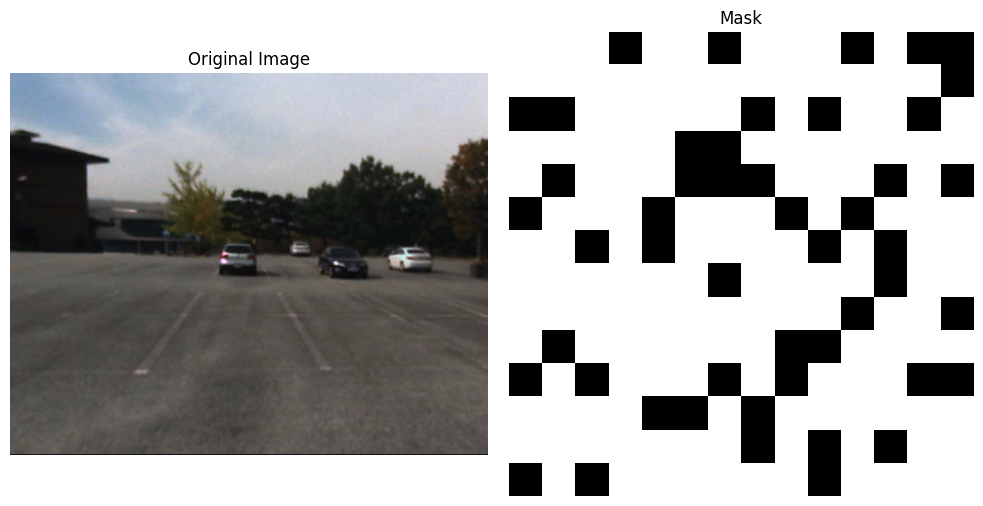

Mask Ratio: 75.00%
Number of masked patches: 147.0
Total number of patches: 196


In [5]:
import torch
from transformers import ViTMAEForPreTraining, AutoImageProcessor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = "/content/drive/MyDrive/training_results_rgb/trained_model"
model = ViTMAEForPreTraining.from_pretrained(model_path)
processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")

# Prepare a sample image
image_path = "/content/drive/MyDrive/KAISTV00/images/V000/visible/I00000.jpg"  # Replace with an actual image path
image = Image.open(image_path).convert("RGB")

# Process the image and run it through the model
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Get the mask and reshape it
mask = outputs.mask.squeeze().cpu().numpy()
mask_reshaped = mask.reshape(14, 14)  # Assuming 14x14 patches for a 224x224 image

# Visualize the mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_reshaped, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print mask statistics
mask_ratio = mask.sum() / mask.size
print(f"Mask Ratio: {mask_ratio:.2%}")
print(f"Number of masked patches: {mask.sum()}")
print(f"Total number of patches: {mask.size}")

## Loss plot

{'train_loss': [0.007914779979238609, 0.0003138965699830666, 0.00010511839970534381, 3.922711333031587e-05, 2.2149021998092605e-05, 1.529757481386276e-05, 1.2854437255345356e-05, 1.1927611992107883e-05, 1.1229727883451582e-05, 1.0872936889847131e-05, 1.0407701665826607e-05, 9.570548172632698e-06, 9.211017501141983e-06, 9.115227980006379e-06, 8.761333866949337e-06, 8.638525986708164e-06, 9.137216623527751e-06, 8.37028458660755e-06, 8.376971961227424e-06, 8.119342895112753e-06, 8.153432610505171e-06, 8.3274323445109e-06, 8.293514453655986e-06, 7.815744083927711e-06, 7.539889443600819e-06, 7.987412048420923e-06, 8.059185452461512e-06, 7.685896644733684e-06, 7.952474683966451e-06, 7.911743243592075e-06, 7.880613933453928e-06, 9.631188976737367e-06, 9.102233364571406e-06, 9.899075499001461e-06, 7.773643644143773e-06, 8.943030549674473e-06, 8.019347905456716e-06, 9.905049689852884e-06, 1.6412488898472824e-05, 1.3170582301077397e-05, 9.34129058385644e-06, 8.41601261597064e-06, 8.9621570483499

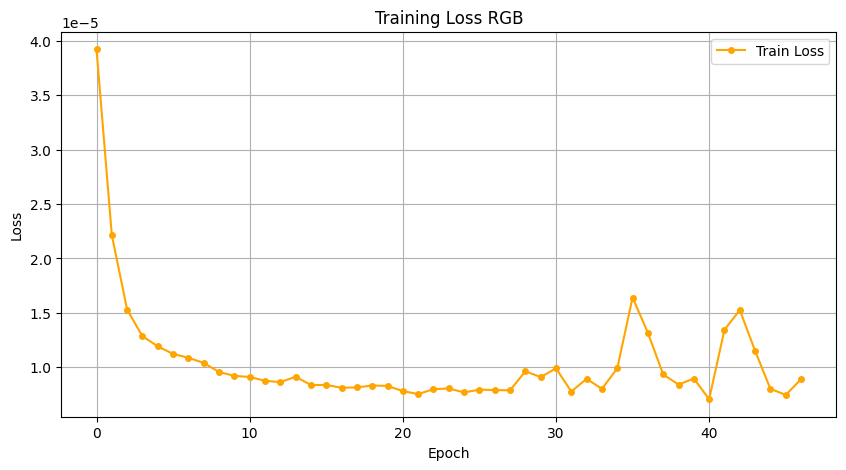

In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Open and read the JSON file
with open(r'/content/drive/MyDrive/training_results_rgb/metrics.json', 'r') as file:
    metrics = json.load(file)

# Print the data
print(metrics)
print(len(metrics["train_loss"]))

filter_loss = np.array(metrics["train_loss"][3:])

ave_loss = np.mean(filter_loss)
std_loss = np.std(filter_loss)
print(f"Average Loss: {ave_loss}")
print(f"Standard Deviation of Loss: {std_loss}")


# Create an array for epochs
epochs_array = np.arange(len(metrics["train_loss"]))

# Plot and save Loss graph
plt.figure(figsize=(10, 5))
plt.plot(filter_loss, 'o-', color='orange', markersize=4, label="Train Loss")
plt.title("Training Loss RGB")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/DL Project/rgb_loss.png')
plt.show()


# RGB + Generative Images

## Mask Ratio

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


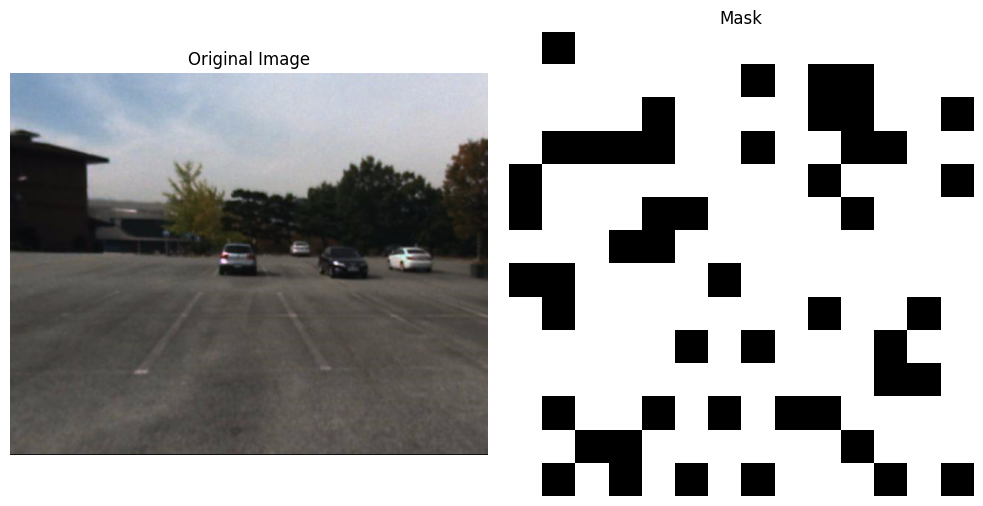

Mask Ratio: 75.00%
Number of masked patches: 147.0
Total number of patches: 196


In [10]:
import torch
from transformers import ViTMAEForPreTraining, AutoImageProcessor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = "/content/drive/MyDrive/rgb_training_results (1)/trained_model"
model = ViTMAEForPreTraining.from_pretrained(model_path)
processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")

# Prepare a sample image
image_path = "/content/drive/MyDrive/KAISTV00/images/V000/visible/I00000.jpg"  # Replace with an actual image path
image = Image.open(image_path).convert("RGB")

# Process the image and run it through the model
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Get the mask and reshape it
mask = outputs.mask.squeeze().cpu().numpy()
mask_reshaped = mask.reshape(14, 14)  # Assuming 14x14 patches for a 224x224 image

# Visualize the mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_reshaped, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print mask statistics
mask_ratio = mask.sum() / mask.size
print(f"Mask Ratio: {mask_ratio:.2%}")
print(f"Number of masked patches: {mask.sum()}")
print(f"Total number of patches: {mask.size}")

# Loss plot

{'train_loss': [0.006833006856770505, 0.00017375417127578447, 5.7271570907547495e-05, 2.4185274994054522e-05, 1.7319910581975888e-05, 1.275774831391083e-05, 1.1031089833033127e-05, 1.580123975705087e-05, 3.093113886839442e-05, 1.3597551584937788e-05, 2.009508464722715e-05, 3.0270791774875342e-05, 2.183631788564246e-05, 9.83153659735063e-06, 8.678446717497605e-06, 1.022046325698074e-05, 9.041731223428193e-06, 7.413471044296434e-06, 1.8101692358658722e-05, 2.3262671780125507e-05, 2.150990359531044e-05, 1.0365500586955863e-05, 9.964077924870742e-06, 7.938111558849834e-06, 9.252000626684794e-06, 3.087779028786687e-05, 2.2542892181193634e-05, 9.372553519754616e-06, 9.060951819824717e-06, 1.1208137248803932e-05, 9.369671505947526e-06, 7.3611158418666145e-06, 7.548692058033059e-06, 1.5778502844253897e-05, 1.7071415466209426e-05, 9.436429186630099e-06, 2.0727595046292452e-05, 1.620246484890231e-05, 9.269859709512764e-06, 1.205977895761652e-05, 7.703569001303269e-06, 1.3819273520381943e-05, 1.0

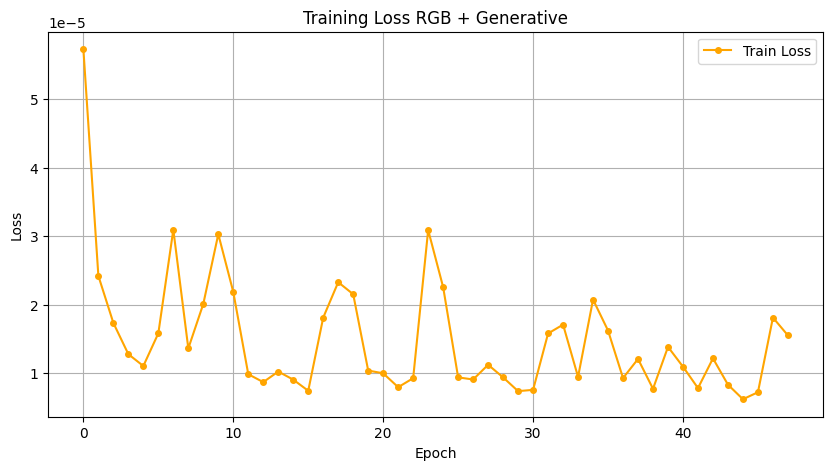

In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Open and read the JSON file
with open(r'/content/drive/MyDrive/rgb_training_results (1)/metrics.json', 'r') as file:
    metrics = json.load(file)

# Print the data
print(metrics)
print(len(metrics["train_loss"]))

filter_loss = np.array(metrics["train_loss"][2:])
ave_loss = np.mean(filter_loss)
std_loss = np.std(filter_loss)
print(f"Average Loss: {ave_loss}")
print(f"Standard Deviation of Loss: {std_loss}")

# Create an array for epochs
epochs_array = np.arange(len(metrics["train_loss"]))

# Plot and save Loss graph
plt.figure(figsize=(10, 5))
plt.plot(filter_loss, 'o-', color='orange', markersize=4, label="Train Loss")
plt.title("Training Loss RGB + Generative")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/DL Project/rgb_gen_loss.png')
plt.show()

# Only Thermal Images

## Mask Ratio

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


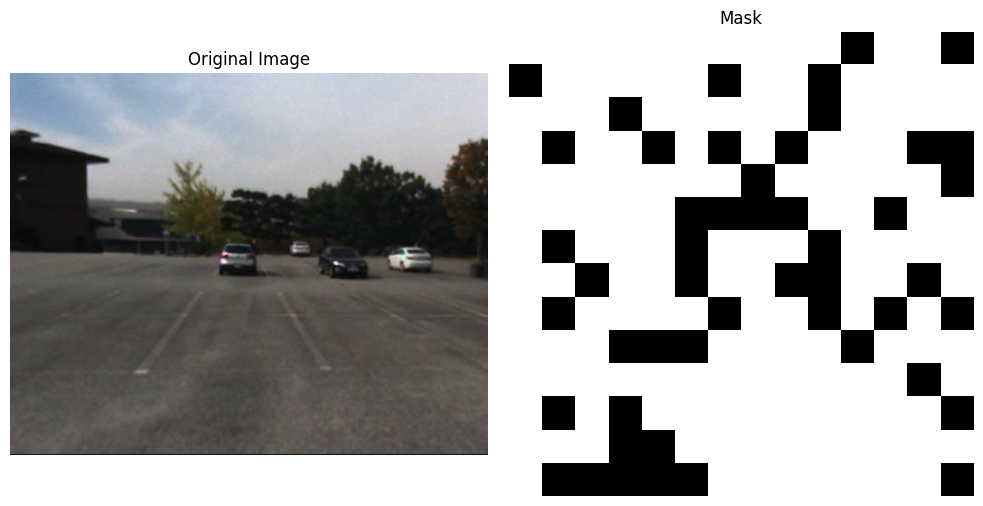

Mask Ratio: 75.00%
Number of masked patches: 147.0
Total number of patches: 196


In [13]:
import torch
from transformers import ViTMAEForPreTraining, AutoImageProcessor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = "/content/drive/MyDrive/training_results_thermal/trained_model"
model = ViTMAEForPreTraining.from_pretrained(model_path)
processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")

# Prepare a sample image
image_path = "/content/drive/MyDrive/KAISTV00/images/V000/visible/I00000.jpg"  # Replace with an actual image path
image = Image.open(image_path).convert("RGB")

# Process the image and run it through the model
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Get the mask and reshape it
mask = outputs.mask.squeeze().cpu().numpy()
mask_reshaped = mask.reshape(14, 14)  # Assuming 14x14 patches for a 224x224 image

# Visualize the mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_reshaped, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print mask statistics
mask_ratio = mask.sum() / mask.size
print(f"Mask Ratio: {mask_ratio:.2%}")
print(f"Number of masked patches: {mask.sum()}")
print(f"Total number of patches: {mask.size}")

## Loss Plot

{'train_loss': [0.008004072330480155, 0.00027251624459705246, 7.931168511277065e-05, 3.181593931983046e-05, 1.6692828327135292e-05, 9.69843215268786e-06, 7.362968972302042e-06, 6.342246496597699e-06, 5.5486575547547545e-06, 4.997568339604186e-06, 4.462153496066234e-06, 4.03949633647034e-06, 3.854345462829e-06, 3.5726671880043937e-06, 3.4642209636960897e-06, 3.163691434775291e-06, 2.9058793153616043e-06, 2.7935631211361256e-06, 2.668239438627587e-06, 2.90012438269444e-06, 2.6524968549123373e-06, 2.4643132362073698e-06, 2.3091010741784257e-06, 2.153723156740083e-06, 2.3705964185165403e-06, 2.400645004085023e-06, 2.5843284692410425e-06, 2.667208500147703e-06, 3.4168697049188686e-06, 2.2242269936284106e-06, 3.0171444135563574e-06, 5.6030468106025815e-05, 1.6182989716421267e-05, 5.092133882009455e-06, 2.699688995842455e-06, 2.426948045607647e-06, 2.0353417085061665e-06, 1.6946406119062046e-06, 1.520097629718993e-06, 1.5023362126297657e-06, 1.6381930068886363e-06, 1.6798449520977626e-06, 1.6

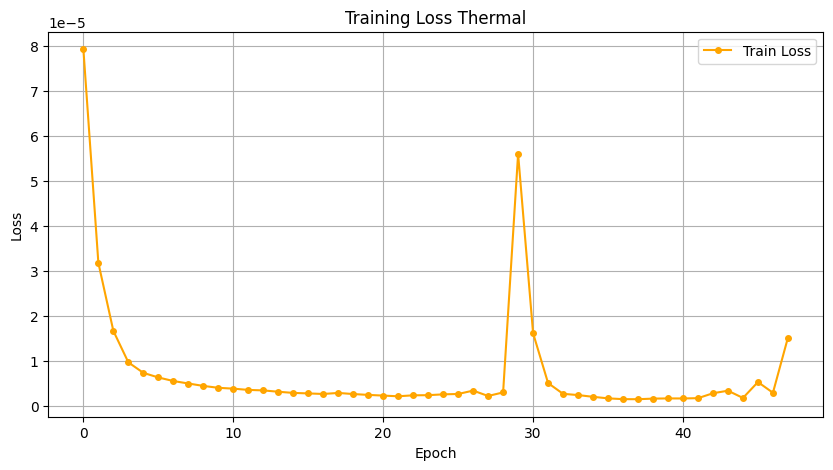

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Open and read the JSON file
with open(r'/content/drive/MyDrive/training_results_thermal/metrics.json', 'r') as file:
    metrics = json.load(file)

# Print the data
print(metrics)
print(len(metrics["train_loss"]))

filter_loss = np.array(metrics["train_loss"][2:])
ave_loss = np.mean(filter_loss)
std_loss = np.std(filter_loss)
print(f"Average Loss: {ave_loss}")
print(f"Standard Deviation of Loss: {std_loss}")

# Create an array for epochs
epochs_array = np.arange(len(metrics["train_loss"]))

# Plot and save Loss graph
plt.figure(figsize=(10, 5))
plt.plot(filter_loss, 'o-', color='orange', markersize=4, label="Train Loss")
plt.title("Training Loss Thermal")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/DL Project/thermal_loss.png')
plt.show()

# Thermal + Generative Images

## Mask Ratio

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


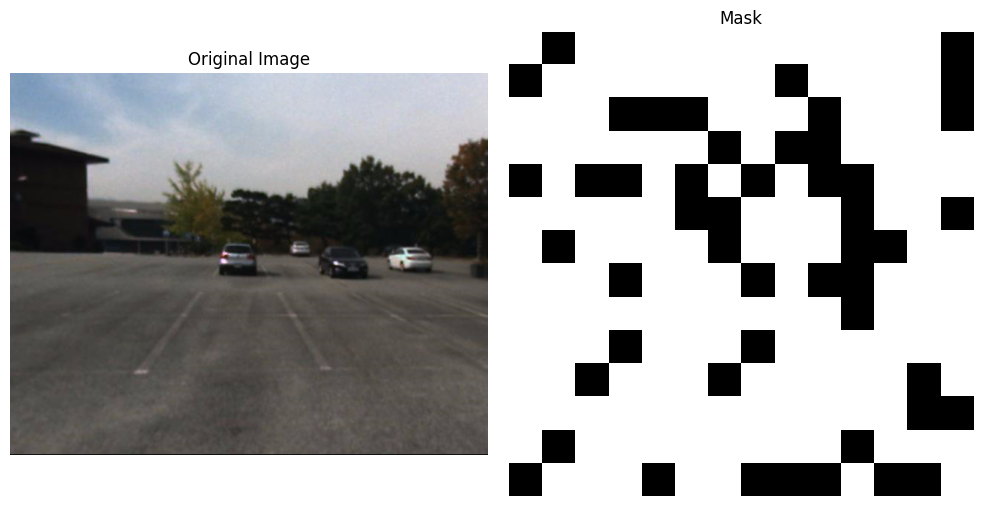

Mask Ratio: 75.00%
Number of masked patches: 147.0
Total number of patches: 196


In [16]:
import torch
from transformers import ViTMAEForPreTraining, AutoImageProcessor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = "/content/drive/MyDrive/training_results_thermal_gen/trained_model"
model = ViTMAEForPreTraining.from_pretrained(model_path)
processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")

# Prepare a sample image
image_path = "/content/drive/MyDrive/KAISTV00/images/V000/visible/I00000.jpg"  # Replace with an actual image path
image = Image.open(image_path).convert("RGB")

# Process the image and run it through the model
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Get the mask and reshape it
mask = outputs.mask.squeeze().cpu().numpy()
mask_reshaped = mask.reshape(14, 14)  # Assuming 14x14 patches for a 224x224 image

# Visualize the mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_reshaped, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print mask statistics
mask_ratio = mask.sum() / mask.size
print(f"Mask Ratio: {mask_ratio:.2%}")
print(f"Number of masked patches: {mask.sum()}")
print(f"Total number of patches: {mask.size}")

## Loss Graph

{'train_loss': [0.0041087003771099265, 5.465889640618115e-05, 1.1762348312913673e-05, 5.701421505364124e-06, 4.216412162350025e-06, 3.640324721345678e-06, 3.284175272710854e-06, 2.8170851419417887e-06, 2.6065970814670434e-06, 2.363343974138843e-06, 2.236252366856206e-06, 2.2349765913531883e-06, 2.1893629718761076e-06, 2.393206473243481e-06, 1.7883477535178828e-05, 3.3307585545117033e-06, 2.11859070986975e-06, 2.267243453388801e-06, 1.2461119345061889e-05, 3.3790992665672093e-06, 9.617699747650477e-06, 3.378714682185091e-06, 7.394804579234915e-06, 2.9677742622880033e-06, 4.1217652687919325e-06, 1.8523147637097282e-05, 5.778603699582163e-06, 2.69778093752393e-06, 1.685953347987379e-06, 1.9272700228611937e-06, 1.1307785666758718e-05, 3.2807874458740115e-06, 7.462391113222111e-06, 7.266620041264105e-06, 8.469857339150622e-06, 1.7157420097646537e-06, 2.5209278783222545e-06, 2.1779183443868534e-05, 9.82833549642237e-06, 2.51254048635019e-06, 1.6765301188570448e-06, 1.5146915893637924e-06, 1.

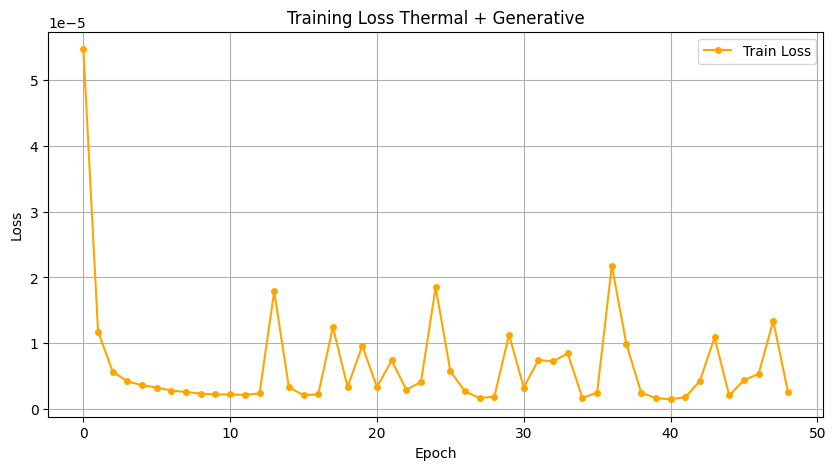

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Open and read the JSON file
with open(r'/content/drive/MyDrive/training_results_thermal_gen/metrics.json', 'r') as file:
    metrics = json.load(file)

# Print the data
print(metrics)
print(len(metrics["train_loss"]))

filter_loss = np.array(metrics["train_loss"][1:])
ave_loss = np.mean(filter_loss)
std_loss = np.std(filter_loss)
print(f"Average Loss: {ave_loss}")
print(f"Standard Deviation of Loss: {std_loss}")

# Create an array for epochs
epochs_array = np.arange(len(metrics["train_loss"]))

# Plot and save Loss graph
plt.figure(figsize=(10, 5))
plt.plot(filter_loss, 'o-', color='orange', markersize=4, label="Train Loss")
plt.title("Training Loss Thermal + Generative")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/DL Project/thermal_gen_loss.png')
plt.show()